# Arbre et Trie (correction)

Correction.

## Exercice 1


In [1]:
import random


def mot_alea(l):
    l = [chr(97 + random.randint(0, 25)) for i in range(l)]
    return "".join(l)


taille = 20
N = 10000
mots = [mot_alea(taille) for _ in range(N)]
print(len(mots))

10000


## Exercice 2

In [2]:
import time

debut = time.perf_counter()
for k in mots:
    i = mots.index(k)
fin = time.perf_counter()
print("recherche simple", fin - debut)

recherche simple 1.2651422999999795


Avec ``%timeit`` :

In [3]:
# %timeit for k in mots : i = mots.index(k)

1.17 s ± 208 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Exercice 3 : recherche dichotomique

In [4]:
def dicho(mots, x):
    a = 0
    b = len(mots) - 1
    while a < b:
        m = (a + b) // 2
        t = mots[m]
        if t < x:
            b = m - 1
        elif t == x:
            return m
        else:
            a = m + 1
    return a


mots.sort()

debut = time.perf_counter()
for k in mots:
    i = dicho(mots, k)
fin = time.perf_counter()
print("dichotomie", fin - debut)

dichotomie 0.06771000000003369


In [5]:
%timeit for k in mots : i = dicho(mots, k)

31.9 ms ± 2.21 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Exercice 4

In [7]:
import math

for N in [10, 100, 1000, 10000, 100000]:
    mots = [mot_alea(taille) for _ in range(N)]
    tolook = [mots[random.randint(0, len(mots) - 1)] for i in range(0, 100)]
    mots.sort()

    debut = time.perf_counter()
    for k in tolook:
        i = mots.index(k)
    fin = time.perf_counter()
    ds = fin - debut

    debut = time.perf_counter()
    for k in tolook:
        i = dicho(mots, k)
    fin = time.perf_counter()
    dd = fin - debut

    print(
        N,
        "simple",
        ds,
        "dicho",
        dd,
        "ratio",
        ds / max(dd, 1),
        " ratio théorique ",
        len(mots) / math.log(len(mots)) * math.log(2) / 30,
    )

10 simple 4.340000032243552e-05 dicho 0.00010930000007647322 ratio 4.340000032243552e-05  ratio théorique  0.1003433318879937
100 simple 0.00016539999978704145 dicho 0.00020910000012008823 ratio 0.00016539999978704145  ratio théorique  0.5017166594399687
1000 simple 0.0016119000001708628 dicho 0.0002951000001303328 ratio 0.0016119000001708628  ratio théorique  3.3447777295997914
10000 simple 0.025103800000124465 dicho 0.0005895999997846957 ratio 0.025103800000124465  ratio théorique  25.085832971998425
100000 simple 0.4739787999997134 dicho 0.0006374999998115527 ratio 0.4739787999997134  ratio théorique  200.68666377598748


Même chose avec ``timeit`` mais en plus long.

In [9]:
if False:
    for N in [10, 100, 1000, 10000, 100000]:
        print("N=", N)
        mots = [mot_alea(taille) for _ in range(N)]
        tolook = [mots[random.randint(0, len(mots) - 1)] for i in range(0, 100)]
        mots.sort()

        %timeit for k in tolook : i = mots.index(k)
        %timeit for k in tolook : i = dicho(mots, k)

Soit $N$ le nombre de mots dans la liste :

* coût de la recherche simple : $O(N)$ 
* coût de la recherche dichotomique : $O(\ln N)$ 

Le ratio $N/\ln N$ mesuré en pratique devrait être sensiblement égal au ratio théorique à un facteur multiplication près. Le trie du tableau qui précède la recherche dichotomique n'est pas pris en compte. Plus on effectue de recherche, plus son coût devient marginal. Ce coût explique néanmoins pourquoi on ne fait pas toujours une recherche dichotomique.

## Exercice 5 : trie

In [10]:
def build_trie(mots):
    trie = {}
    for m in mots:
        r = trie
        for c in m:
            if c not in r:
                r[c] = {}
            r = r[c]
    return trie


mots = ["aaa", "aba", "aab", "baa", "bbb", "bba", "bab"]

trie = build_trie(mots)
print(trie)

{'a': {'a': {'a': {}, 'b': {}}, 'b': {'a': {}}}, 'b': {'a': {'a': {}, 'b': {}}, 'b': {'b': {}, 'a': {}}}}


## Exercice 6 : recherche dans un trie

In [11]:
def lookup(trie, m):
    r = trie
    for c in m:
        if c in r:
            r = r[c]
        else:
            return False
    return True


for k in mots:
    print(k, lookup(trie, k))
print("bcc", lookup(trie, "bcc"))

aaa True
aba True
aab True
baa True
bbb True
bba True
bab True
bcc False


Pour illustrer la structure d'arbre du trie, on l'affiche avec la fonction suivante : 

In [12]:
def print_trie(trie, niveau=0):
    for k, v in sorted(trie.items()):
        print("  " * niveau + k)
        if len(v) > 0:
            print_trie(v, niveau + 1)


print_trie(trie)

a
  a
    a
    b
  b
    a
b
  a
    a
    b
  b
    a
    b


Il reste un inconvénient à cette représentation. Si on construire le trie pour le mot ``["aaa"]`` ou les mots ``["aa","aaa]"``, on obtient le même trie :

In [13]:
print_trie(build_trie(["aaa"]))

a
  a
    a


In [14]:
print_trie(build_trie(["aaa", "aa"]))

a
  a
    a


Pour éviter cela, le plus simple est de représenter la fin d'un mot comme un caractère à part entière.

In [15]:
print_trie(build_trie(["aaa*"]))

a
  a
    a
      *


In [16]:
print_trie(build_trie(["aaa*", "aa*"]))

a
  a
    *
    a
      *


## Exercice 7

Soit $L$ la longueur maximale des mots et $C$ le nombre de lettres distinctes, avec un trie, le coût de la recherche est majoré par : $O(L \ln C)$. On reprend le code de l'exercice 5 et on ajoute le code associé au trie. On effectue 10000 recherches au lieu de 1000 pour avoir une meilleure estimation de la différence (pour vous en convaincre, il suffit comparer les temps obtenus par deux exécution de ce même code).

In [20]:
for N in [10, 100, 1000, 10000, 100000]:  # , 200000, 400000] :
    mots = [mot_alea(taille) for _ in range(N)]
    tolook = [mots[random.randint(0, len(mots) - 1)] for i in range(0, 100)]
    trie = build_trie(mots)
    mots.sort()

    debut = time.perf_counter()
    for k in tolook:
        i = dicho(mots, k)
    fin = time.perf_counter()
    dd = fin - debut

    debut = time.perf_counter()
    for k in tolook:
        i = lookup(trie, k)
    fin = time.perf_counter()
    dt = fin - debut

    print(N, "dicho", dd, "trie", dt)

10 dicho 0.00015950000033626566 trie 0.00017660000003161258
100 dicho 0.0001847000003181165 trie 0.0002316999998583924
1000 dicho 0.00035339999976713443 trie 0.0002839999997377163
10000 dicho 0.0003455000000940345 trie 0.00033450000000811997
100000 dicho 0.0003973000002588378 trie 0.0003483000000414904


Confirmation avec une mesure plus robuste.

In [18]:
if False:
    for N in [10, 100, 1000, 10000, 100000, 200000, 400000]:
        print("N=", N)
        mots = [mot_alea(taille) for _ in range(N)]
        tolook = [mots[random.randint(0, len(mots) - 1)] for i in range(0, 10000)]
        trie = build_trie(mots)
        mots.sort()

        %timeit for k in tolook : i = dicho(mots, k)
        %timeit for k in tolook : i = lookup(trie, k)

Encore une fois, le temps de construction du trie n'est pas pris en compte. Plus il y a de recherche à effectuer, plus il devient négligeable.

Le dictionnaire est un object courant dans la plupart des languages. En python, celui-ci utilise une [table de hachage](http://fr.wikipedia.org/wiki/Table_de_hachage) et le coût d'accès à un élément n'est pas en $O(\ln n)$ mais en $O(n)$ (voir [time complexity](https://wiki.python.org/moin/TimeComplexity)). En C++, le dictionnaire (ou [map](http://www.cplusplus.com/reference/map/map/)) utilise un arbre binaire et l'accès à un élément a un coût logarithmique : [Standard C++ Containers](http://www.cs.northwestern.edu/~riesbeck/programming/c++/stl-summary.html).

## Plus en détails

La recherche dichotomique est équivalente à celle opérée avec un [arbre binaire de recherche](http://fr.wikipedia.org/wiki/Arbre_binaire_de_recherche) (si ce dernier est [équilibré](http://fr.wikipedia.org/wiki/Arbre_B) ou [arbre rouge/noir](http://fr.wikipedia.org/wiki/Arbre_bicolore)). Ce dernier consiste à classer les éléments par ordre alphabétique. Un arbre est souvent représenté par une classe et non par un dictionnaire comme la dernière partie de cette session le laissait supposer.

In [21]:
class Arbre:
    def __init__(self, value):
        self.value = value
        self.children = []

    def add_child(self, child):
        self.children.append(child)

    def __str__(self):
        rows = ["value={0}".format(self.value)]
        for c in self.children:
            s = str(c)
            lines = ["    " + l for l in s.split("\n")]
            rows.extend(lines)
        return "\n".join(rows)


root = Arbre("racine")
child1 = Arbre("child 1")
child1.add_child(Arbre("child 2"))
child1.add_child(Arbre("child 1000"))
root.add_child(child1)
root.add_child(Arbre("child 3"))
print(root)

value=racine
    value=child 1
        value=child 2
        value=child 1000
    value=child 3


Les arbres sont des graphes particuliers car il ne contiennent pas de cycles. Il est possible de parcourir les noeuds, de les numéroter. Ils sont très utilisés en machine learning avec les [arbres de décisions](http://fr.wikipedia.org/wiki/Arbre_de_d%C3%A9cision) ou les [random forests](http://en.wikipedia.org/wiki/Random_forest). Ils sont parfois cachés comme dans le cas de la recherche dichotomique qui peut être implémentée à partir d'une structure d'arbre.

Dans le cas de le recherche dichotomique, on suppose que le nombre de noeuds fils est toujours 2. L'ordre alphabétique est le suivant : noeuds fils 1, noeud courant, noeud fils 2. Les deux noeuds fils pourraient être nuls. L'implémentation de l'arbre serait la suivante :

In [22]:
class ArbreDicho:
    def __init__(self, value):
        self.value = value
        self.before = None
        self.after = None

    def __str__(self):
        return "value={0}".format(self.value)

    def add_before(self, child):
        self.before = child

    def add_after(self, child):
        self.after = child

    def find(self, word):
        if self.value == word:
            return self
        elif word < self.value:
            if self.before is None:
                return None
            else:
                return self.before.find(word)
        else:
            if self.after is None:
                return None
            else:
                return self.after.find(word)

    def sorted_list(self):
        res = []
        if self.before is not None:
            res.extend(self.before.sorted_list())
        res.append(self.value)
        if self.after is not None:
            res.extend(self.after.sorted_list())
        return res


# on crée un arbre dont les noeuds vérifient la propriété énoncé plus haut (les mots apparaissent dans le bon ordre)
root = ArbreDicho("milieu")
root.add_before(ArbreDicho("avant"))
root.add_after(ArbreDicho("zillion"))
root.before.add_before(ArbreDicho("alphabet"))
root.before.add_after(ArbreDicho("avant après"))

# on vérifie que c'est bien le cas
all = root.sorted_list()
assert all == sorted(all)
print(all)

# on effectue la recherche
for a in all:
    f = root.find(a)
    print(f)

['alphabet', 'avant', 'avant après', 'milieu', 'zillion']
value=alphabet
value=avant
value=avant après
value=milieu
value=zillion


## Questions

Questions posées par les étudiants.

**Q1**

Il s'agit de reproduire à l'aide de dictionnaires un trie.
Voici le code que vous avez donné et qui effectivement fonctionne à merveille.

In [23]:
def build_trie(mots):
    trie = {}
    for m in mots:
        r = trie
        for c in m:
            if c not in r:
                r[c] = {}
            r = r[c]
    return trie

Cependant, je ne comprends pas très bien comment il fait pour tourner !
A quel moment est ce que l'on modifie le dictionnaire ``trie`` défini
initialement comme ``{}`` ? Pour moi, pour chaque ``m`` dans ``mots``,
on ne fait que créer une copie nommée ``r`` de trie,
c'est à dire au début ``{}``, puis on réalise des opérations
sur ce ``r`` que l'on modifie en cours de route, et à la fin de ces opérations,
on passe au mot suivant en créant une nouvelle copie ``r`` de ``trie``,
à savoir toujours ``{}`` !

**réponse**

Il existe un bon moyen de visualiser l'exécution, c'est le site
`Python Tutor <http://pythontutor.com/>`_. En recopiant, l'exemple suivant,
on peut suivre pas à pas l'exécution 

In [24]:
def build_trie(mots):
    trie = {}
    for m in mots:
        r = trie
        for c in m:
            if c not in r:
                r[c] = {}
            r = r[c]
    return trie


mots = ["aaa", "aba", "aab", "baa", "bbb", "bba", "bab"]
trie = build_trie(mots)
print(trie)

{'a': {'a': {'a': {}, 'b': {}}, 'b': {'a': {}}}, 'b': {'a': {'a': {}, 'b': {}}, 'b': {'b': {}, 'a': {}}}}


A chaque nouveau mot, les premiers caractères vont probablement faire déjà partie du
trie, les derniers vont être ajoutés au bout d'une branche existante. La question
est comment trouver cette branche. Cette branche peut avoir une longueur
variable.

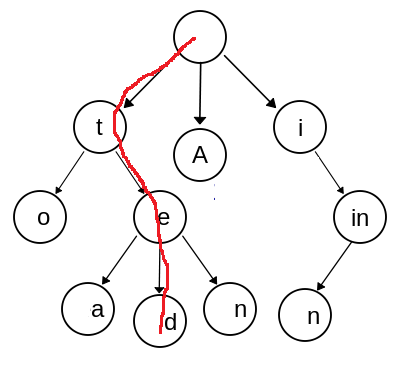

In [26]:
from IPython.display import Image

Image("wiki_trie2.png")

Pour trouver cette branche, le mécanisme qu'on utilise est très proche de celui qu'on uilise pour se déplacer dans une [liste chaînée](https://fr.wikipedia.org/wiki/Liste_cha%C3%AEn%C3%A9e). Dans une liste chaînée, il n'y a pas d'indice pour un élément. Chaque élément pointe sur le suivant.

In [ ]:
class liste_chainee:
    def __init__(self, value):
        self.value = value
        self.next = None

    def attache(self, element):
        self.next = element

    def atteindre_la_fin(self):
        position_courante = self
        if position_courante.next is not None:
            position_courante = position_courante.next
        return position_courante


e0 = liste_chainee(0)
e1 = liste_chainee(1)
e2 = liste_chainee(2)
e0.attache(e1)
e1.attache(e2)

fin = e0.atteindre_la_fin()
print(fin.value)

Cet exemple est plus simple car pour se déplacer du début à la fin, il n'y qu'une seule *direction* : soit on est à la fin, soit il faut continuer car il y a un élément suivant (``next`` n'est pas ``None``).

Toutefois, le programme précédent montre qu'il faut utiliser une variable ``position_courante`` qui mémorise la position à laquelle on se trouve lorsqu'on parcours la liste. Pour avancer, on exécute simplement : ``position_courante = position_courante.next``.

La position courante devient la suivante. Dans le cas du trie, cette instruction change car l'élément suivant dépend du caractère ``c`` : ``r = r[c]``.

Le premier code comprend deux éléments :

* le fait de se promener le long d'un chemin ::

    ```
    r = trie  # initialisation
    r = r[c]  # on avance d'un cran
    ```

* le fait d'ajouter un caractère au trie ::

    ```
    r[c] = { }
    ```

Le caractère ``c`` a été ajouté au trie en tant que clé d'un dictionnaire,
lui-même valeur d'un dictionnaire associé à une clé égale
au caractère précédent dans le mot qu'on est en train d'ajouter.

**Q2**

**suite**

Lorsque l'on crée un dictionnaire, appelons le "a", puis que l'on en crée
une autre copie, que l'on appelle "b", et que l'on modifie b,
alors a se retrouve modifié ! Le dictionnaire ``b`` est en fait plus qu'une copie,
mais une deuxième entité qui code le même objet,
et je crois que c'est ca que je n'avais pas compris.

Par ailleurs, ce qui est surprenant, c'est que ceci ne fonctionne
qu'avec les dictionnaires ! Lorsque l'on execute ceci :

In [27]:
a = []
b = a
b = b + [2]
print(a)

[]


Alors la sortie est ``[]``. Quand on execute ceci :

In [28]:
a = {}
b = a
b[1] = 1
print(a)

{1: 1}


La réponse est ``{1 : 1}``.

**réponse**

Ceci est une propriété des listes et des dictionnaires qui sont des objets **mutable** en Python.
Je renvoie à la page [Qu’est-ce qu’un type immuable ou immutable ?](https://sdpython.github.io/doc/teachpyx/dev/py/c_lang/types.html#types-immuables-ou-immutable).
pour comprendre ce que sont ces deux propriétés en particulier.

Les listes sont **mutable**. Donc si on écrit ``b = a``, on crée un second identifiant pour accéder
à la même liste. Voici pourquoi écrire ``a[0]=1`` a le même effet que ``b[0]=1``.
Toutefois, dans le cas où ``b`` désigne une copie de la liste ``a``, ces deux instructions
n'auront pas les mêmes conséquences. Pour comprendre le résultat, il faut se demander
dans quel cas, on ne fait de copie, dans quel autre une copie a été créée.

L'instruction ``b=a`` ne crée pas de copie. L'instuction ``b=b+[2]`` construit
la concaténation de deux listes, c'est donc une nouvelle liste qu'on affecte à ``b``.
Dans l'exemple suivant, ce n'est plus le cas même si le code paraît équivalent :

In [29]:
a = []
b = a
b += [2]  # --> il n'y a plus de copie implicite
print(a)  # --> affiche [2]

[2]


Le même exemple pour être écrit avec des dictionnaires car ils sont aussi **mutable**.